<a href="https://colab.research.google.com/github/beyenidogan/ComedyAnalysis/blob/main/Comedy_Scripts_Language_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the required libraries**

Importing required libraries for analysis and web scraping.

In [ ]:
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import string
import csv
import json
#import requests

Importing components for parsing HTML documents from web.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup, Comment

The source websites had an issue with certification for a brief period of time, hence including this following line of code to bypass the verification.

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

The google drive access should be given to be able to write the resulting analysis into a file at the end.

In [ ]:
from google.colab import  drive

# **Scraping the Comedy Scripts**

Reading list of urls for comedy scripts from file.

In [ ]:
df_url = pd.read_csv('https://raw.githubusercontent.com/beyenidogan/ComedyAnalysis/main/Analysis/all_urls.csv', on_bad_lines='skip')
df_url.head()

,url
0,https://scrapsfromtheloft.com/comedy/adam-devi...
1,https://scrapsfromtheloft.com/comedy/adam-sand...
2,https://scrapsfromtheloft.com/comedy/al-madrig...
3,https://scrapsfromtheloft.com/comedy/ali-wong-...
4,https://scrapsfromtheloft.com/comedy/ali-wong-...


In [ ]:
print(df_url.shape)

(159, 1)


Reading main text from list of urls to save to dataframe, excluding unnecassary lines from the text.

In [ ]:
df_url['title'] = ''
df_url['raw_text'] = ''
k = 0
for link in df_url.iterrows():
      url = link[1]['url']
      html = urlopen(url)
      soup = BeautifulSoup(html, 'lxml')
      df_url.at[k,'title'] = soup.title
      script_raw = soup.find_all("div", class_="elementor-element elementor-element-74af9a5b elementor-widget elementor-widget-theme-post-content")
      for tag in script_raw:
          script_text=tag.text
          script_text_splitted=script_text.splitlines(True)
          #script_text_cleaned = [item for item in script_text_splitted if (not item.startswith('♪') and not item.startswith('\n') and not item.startswith('[') and '(adsbygoogle'not in item)]
          script_text_cleaned = [item for item in script_text_splitted if (not item.startswith('♪')  and '(adsbygoogle'not in item)]
          #script_text_cleaned = [item for item in script_text_splitted if ('(adsbygoogle'not in item)]
      listToStr = ' '.join([str(elem) for elem in script_text_cleaned])
      #listToStr_cleaned=listToStr.replace('\n', '').replace('♪', '')
      listToStr_cleaned=listToStr.replace('\n', '')
      df_url.at[k,'raw_text'] = listToStr_cleaned
      print(k,url)
      k +=1

0 https://scrapsfromtheloft.com/comedy/adam-devine-best-time-of-our-lives-transcript/
1 https://scrapsfromtheloft.com/comedy/adam-sandler-100-fresh-transcript/
2 https://scrapsfromtheloft.com/comedy/al-madrigal-why-is-the-rabbit-crying-2013-full-transcript/
3 https://scrapsfromtheloft.com/comedy/ali-wong-don-wong-transcript/
4 https://scrapsfromtheloft.com/comedy/ali-wong-baby-cobra-2016-full-transcript/
5 https://scrapsfromtheloft.com/comedy/amanda-seales-i-be-knowin-transcript/
6 https://scrapsfromtheloft.com/comedy/amy-schumer-growing-transcript/
7 https://scrapsfromtheloft.com/comedy/anjelah-johnson-not-fancy-transcript/
8 https://scrapsfromtheloft.com/comedy/anthony-jeselnik-fire-in-the-maternity-ward-transcript/
9 https://scrapsfromtheloft.com/comedy/ari-shaffir-double-negative-transcript/
10 https://scrapsfromtheloft.com/comedy/arsenio-hall-smart-and-classy-transcript/
11 https://scrapsfromtheloft.com/comedy/aziz-ansari-right-now-transcript/
12 https://scrapsfromtheloft.com/come

Calculating and checking the length of each text scraped to check if they were scraped correctly.

In [ ]:
df_url['raw_text_length'] = df_url['raw_text'].apply(len)

In [ ]:
print(df_url.head(20))

                                                  url  \
0   https://scrapsfromtheloft.com/comedy/adam-devi...   
1   https://scrapsfromtheloft.com/comedy/adam-sand...   
2   https://scrapsfromtheloft.com/comedy/al-madrig...   
3   https://scrapsfromtheloft.com/comedy/ali-wong-...   
4   https://scrapsfromtheloft.com/comedy/ali-wong-...   
5   https://scrapsfromtheloft.com/comedy/amanda-se...   
6   https://scrapsfromtheloft.com/comedy/amy-schum...   
7   https://scrapsfromtheloft.com/comedy/anjelah-j...   
8   https://scrapsfromtheloft.com/comedy/anthony-j...   
9   https://scrapsfromtheloft.com/comedy/ari-shaff...   
10  https://scrapsfromtheloft.com/comedy/arsenio-h...   
11  https://scrapsfromtheloft.com/comedy/aziz-ansa...   
12  https://scrapsfromtheloft.com/comedy/aziz-ansa...   
13  https://scrapsfromtheloft.com/comedy/bert-krei...   
14  https://scrapsfromtheloft.com/comedy/bert-krei...   
15  https://scrapsfromtheloft.com/comedy/big-jay-o...   
16  https://scrapsfromtheloft.c

In [ ]:
df_url[['raw_text_length']].describe()

,raw_text_length
count,159.000000
mean,48806.182390
std,12147.376772
min,14675.000000
25%,41936.500000
50%,47339.000000
75%,56373.500000
max,87484.000000


Creating a copy of the dataset to be able to perform further analysis.

In [ ]:
df=df_url
print(df.shape)

(159, 4)


In [ ]:
df.head()

,url,title,raw_text,raw_text_length
0,https://scrapsfromtheloft.com/comedy/adam-devi...,[Adam DeVine: Best Time of Our Lives (2019) - ...,[rock music playing] [indistinct chatter] He...,47959
1,https://scrapsfromtheloft.com/comedy/adam-sand...,[Adam Sandler: 100% Fresh (2018) - Full Transc...,"[man] Okay, ready, and… Take your own cue, A...",32570
2,https://scrapsfromtheloft.com/comedy/al-madrig...,[AL MADRIGAL: WHY IS THE RABBIT CRYING? (2013)...,[dog barks] [FisherGreen’s Sisters Brothers ...,53339
3,https://scrapsfromtheloft.com/comedy/ali-wong-...,[Ali Wong: Don Wong (2022) | Transcript - Scra...,"Ladies, gentlemen, and everybody, put your h...",29546
4,https://scrapsfromtheloft.com/comedy/ali-wong-...,[ALI WONG: BABY COBRA (2016) - Full Transcript...,"Ladies and gentlemen, please welcome to the ...",38981


# **Cleaning the Comedy Scripts**

Loading necessary libraries and performing regex operations to remove punctuations and to standardize the words to lowercase form.

In [ ]:
# Load the regular expression library
import re


In [ ]:
# Remove punctuation
df['text_cleaned'] = \
df['raw_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the text to lowercase
df['text_cleaned'] = \
df['text_cleaned'].map(lambda x: x.lower())


In [ ]:
df.head()

,url,title,raw_text,raw_text_length,text_cleaned
0,https://scrapsfromtheloft.com/comedy/adam-devi...,[Adam DeVine: Best Time of Our Lives (2019) - ...,[rock music playing] [indistinct chatter] He...,47959,[rock music playing] [indistinct chatter] he...
1,https://scrapsfromtheloft.com/comedy/adam-sand...,[Adam Sandler: 100% Fresh (2018) - Full Transc...,"[man] Okay, ready, and… Take your own cue, A...",32570,[man] okay ready and… take your own cue adam...
2,https://scrapsfromtheloft.com/comedy/al-madrig...,[AL MADRIGAL: WHY IS THE RABBIT CRYING? (2013)...,[dog barks] [FisherGreen’s Sisters Brothers ...,53339,[dog barks] [fishergreen’s sisters brothers ...
3,https://scrapsfromtheloft.com/comedy/ali-wong-...,[Ali Wong: Don Wong (2022) | Transcript - Scra...,"Ladies, gentlemen, and everybody, put your h...",29546,ladies gentlemen and everybody put your hand...
4,https://scrapsfromtheloft.com/comedy/ali-wong-...,[ALI WONG: BABY COBRA (2016) - Full Transcript...,"Ladies and gentlemen, please welcome to the ...",38981,ladies and gentlemen please welcome to the s...


Removing words between square brackets to remove parentheticals.

In [ ]:
#Remove words between [] paranthesis
df['text_cleaned'] = df['text_cleaned'].str.replace(r"(\s*\[.*?\]\s*)", " ").str.strip()

<ipython-input-17-946fdbbe0564>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_cleaned'] = df['text_cleaned'].str.replace(r"(\s*\[.*?\]\s*)", " ").str.strip()


In [ ]:
df.head(20)

,url,title,raw_text,raw_text_length,text_cleaned
0,https://scrapsfromtheloft.com/comedy/adam-devi...,[Adam DeVine: Best Time of Our Lives (2019) - ...,[rock music playing] [indistinct chatter] He...,47959,hey man how are you thank you let’s do this la...
1,https://scrapsfromtheloft.com/comedy/adam-sand...,[Adam Sandler: 100% Fresh (2018) - Full Transc...,"[man] Okay, ready, and… Take your own cue, A...",32570,okay ready and… take your own cue adam and act...
2,https://scrapsfromtheloft.com/comedy/al-madrig...,[AL MADRIGAL: WHY IS THE RABBIT CRYING? (2013)...,[dog barks] [FisherGreen’s Sisters Brothers ...,53339,ii – ladies and gentlemen please give a warm w...
3,https://scrapsfromtheloft.com/comedy/ali-wong-...,[Ali Wong: Don Wong (2022) | Transcript - Scra...,"Ladies, gentlemen, and everybody, put your h...",29546,ladies gentlemen and everybody put your hands ...
4,https://scrapsfromtheloft.com/comedy/ali-wong-...,[ALI WONG: BABY COBRA (2016) - Full Transcript...,"Ladies and gentlemen, please welcome to the ...",38981,ladies and gentlemen please welcome to the sta...
5,https://scrapsfromtheloft.com/comedy/amanda-se...,[Amanda Seales: I Be Knowin' (2019) - Transcri...,"Now, y’all keep asking me, “Amanda, who is t...",26917,now y’all keep asking me “amanda who is this s...
6,https://scrapsfromtheloft.com/comedy/amy-schum...,[Amy Schumer: Growing (2019) - Full Transcript...,"Yes! Thank you so much, Chicago. Thank you. ...",34077,yes thank you so much chicago thank you i used...
7,https://scrapsfromtheloft.com/comedy/anjelah-j...,[Anjelah Johnson: Not Fancy (2015) - Transcrip...,Not Fancy was filmed at the City National Gr...,38535,not fancy was filmed at the city national grov...
8,https://scrapsfromtheloft.com/comedy/anthony-j...,[Anthony Jeselnik: Fire in the Maternity Ward ...,Now… my best friend’s wife is a born again C...,28356,now… my best friend’s wife is a born again chr...
9,https://scrapsfromtheloft.com/comedy/ari-shaff...,[ARI SHAFFIR: DOUBLE NEGATIVE (2017) - Full Tr...,Shaffir’s Double Negative collection include...,76593,shaffir’s double negative collection includes ...


Removing words between musical notes as they are often songs. Checking the difference in length to see if the processing worked as expected.

In [ ]:
#Removing words between ♪
df['text_cleaned2'] = df['text_cleaned'].str.replace(r"(\s*\♪.*?\♪\s*)", " ").str.strip()

<ipython-input-19-5185029747e8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_cleaned2'] = df['text_cleaned'].str.replace(r"(\s*\♪.*?\♪\s*)", " ").str.strip()


In [ ]:
df['text_cleaned2_length'] = df['text_cleaned2'].apply(len)

In [ ]:
df.head()

,url,title,raw_text,raw_text_length,text_cleaned,text_cleaned2,text_cleaned2_length
0,https://scrapsfromtheloft.com/comedy/adam-devi...,[Adam DeVine: Best Time of Our Lives (2019) - ...,[rock music playing] [indistinct chatter] He...,47959,hey man how are you thank you let’s do this la...,hey man how are you thank you let’s do this la...,42138
1,https://scrapsfromtheloft.com/comedy/adam-sand...,[Adam Sandler: 100% Fresh (2018) - Full Transc...,"[man] Okay, ready, and… Take your own cue, A...",32570,okay ready and… take your own cue adam and act...,okay ready and… take your own cue adam and act...,27395
2,https://scrapsfromtheloft.com/comedy/al-madrig...,[AL MADRIGAL: WHY IS THE RABBIT CRYING? (2013)...,[dog barks] [FisherGreen’s Sisters Brothers ...,53339,ii – ladies and gentlemen please give a warm w...,ii – ladies and gentlemen please give a warm w...,50809
3,https://scrapsfromtheloft.com/comedy/ali-wong-...,[Ali Wong: Don Wong (2022) | Transcript - Scra...,"Ladies, gentlemen, and everybody, put your h...",29546,ladies gentlemen and everybody put your hands ...,ladies gentlemen and everybody put your hands ...,28645
4,https://scrapsfromtheloft.com/comedy/ali-wong-...,[ALI WONG: BABY COBRA (2016) - Full Transcript...,"Ladies and gentlemen, please welcome to the ...",38981,ladies and gentlemen please welcome to the sta...,ladies and gentlemen please welcome to the sta...,37656


Checking a sample row to see if processing worked as expected.

In [ ]:
print(df.loc[37,'text_cleaned'])

what’s up san antonio oh-ho-ho-ho oh i’m so excited to be here thank you guys for coming out i love san antonio i got here last night and i asked this chick “what do you guys do here for fun” – and she’s like… – “i’ll tell you what to do” “you’re gonna drink you’re gonna get plastered you’re gonna end the night with five guys” i had no idea five guys was a burger place i’m like “wow you must be popular” “i’ll start with one” my idea of a threesome is me with a pint of ben & jerry’s i don’t know what we’re doing it’s so good to be here i’ve been traveling non-stop for over a year and i’ve seen all of the country and wow i was recently in north carolina and i went into this bar and i asked the bartender for an old fashioned so he took away my voting rights i was like “whoa that’s…” “whoa whoa” i’m kidding i’m latina i don’t vote we don’t vote we don’t vote not unless it’s american idol or the voice right we don’t do it we don’t do it i’m kidding i love to vote i do it like five six times

In [ ]:
print(df.loc[27,'text_cleaned2'])

he one of the ogs one of the all-time greats he can make you laugh with a look he is a legend in the stand-up game yes he’s so good he’s completely unique i love the guy the hardest gig i ever did was following cedric the entertainer on new year’s eve in oakland talented gifted naturally funny as good as it gets   give it up for the tennessee state marching band give it up for ced cedric – give it up for ced – cedric give it up for ced cedric the entertainer – ced cedric – give it up for ced cedric give it up for ced cedric – give it up for ced – the entertainer – ced cedric – give it up for ced – cedric – give it up for ced – cedric – the entertainer   ladies and gentlemen cedric the entertainer   wassup – nashville cashville what up y’all yay yeah man hey how y’all doing i feel y’all go and have a seat how y’all doing man y’all gotta give up for that tsu band let ’em hear it – that shit wore me out i only did the last two minutes of the dance i’m-a-be like this they let you know boy 

In [ ]:
print(df.head())

                                                 url  \
0  https://scrapsfromtheloft.com/comedy/adam-devi...   
1  https://scrapsfromtheloft.com/comedy/adam-sand...   
2  https://scrapsfromtheloft.com/comedy/al-madrig...   
3  https://scrapsfromtheloft.com/comedy/ali-wong-...   
4  https://scrapsfromtheloft.com/comedy/ali-wong-...   

                                               title  \
0  [Adam DeVine: Best Time of Our Lives (2019) - ...   
1  [Adam Sandler: 100% Fresh (2018) - Full Transc...   
2  [AL MADRIGAL: WHY IS THE RABBIT CRYING? (2013)...   
3  [Ali Wong: Don Wong (2022) | Transcript - Scra...   
4  [ALI WONG: BABY COBRA (2016) - Full Transcript...   

                                            raw_text  raw_text_length  \
0    [rock music playing] [indistinct chatter] He...            47959   
1    [man] Okay, ready, and… Take your own cue, A...            32570   
2    [dog barks] [FisherGreen’s Sisters Brothers ...            53339   
3    Ladies, gentlemen, and everyb

# **Analyzing the Combined Corpus**

Creating a combined word cloud for a combined corpus of of all the script texts to visualize. First importing the wordcloud library for visualization.

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

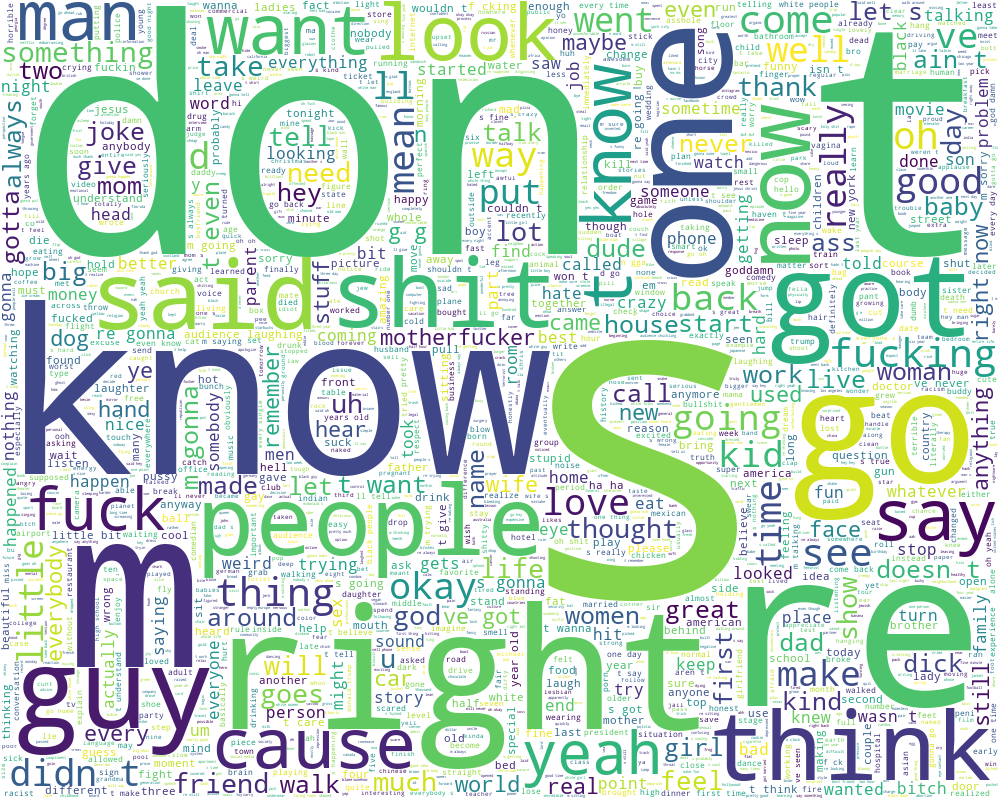

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(df['text_cleaned2'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=6, contour_color='steelblue',width=1000, height=800)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
print(len(long_string))

7214944


The output is generated using the below code and fed into this next step of cleaning up the words which are incomplete. Then using the stopwords operation in NLTK library, the stopwords are removed from the combined corpus. First extending the stopwords to include a manually loaded list of words to be excluded.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
exclude_words = pd.read_csv('https://raw.githubusercontent.com/beyenidogan/ComedyAnalysis/main/Analysis/exclude_words.csv', on_bad_lines='skip')

In [ ]:
exclude_words.head()

,words
0,it
1,re
2,you
3,don
4,oh


In [ ]:
exclude_words_list = exclude_words['words'].to_list()

In [ ]:
print(exclude_words_list)

['it', 're', 'you', 'don', 'oh', 'yeah', 've', 'he', 'we', 'll', 'didn', 'she', 'hey', 'uh', 'us', 'and', 'ain', 'the', 'wasn', 'is', 'em', 'ha', 'isn', 'to', 'ah', 'on', 'in', 'huh', 'ok', 'are', 'yo', 'ooh', 'cos', 'ya', 'gga', 'eh', 'ma', 'am', 'th', 'aw', 'ugh', 'de', 'sht', 'hasn', 'hadn', 'st', 'ggas', 'ii', 'erm', 'pfft', 'mma', 'ta']


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(exclude_words_list)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

Combining again all the scripts to a list of combined words to be able to collectively analyze across all scripts.

In [ ]:
data = df['text_cleaned2'].values.tolist()
print(len(data))

159


In [ ]:
data_words = list(sent_to_words(data))
print(len(data_words))

159


In [ ]:
# remove stop words
data_words = remove_stopwords(data_words)
print(len(data_words))

159


In [ ]:
flat_list = [item for sublist in data_words for item in sublist]
#print(flat_list)

In [ ]:
print(len(flat_list))

641740


In [ ]:
unique_string=(" ").join(flat_list)

Visualizing the combined text using a word cloud, after stopwords are removed.

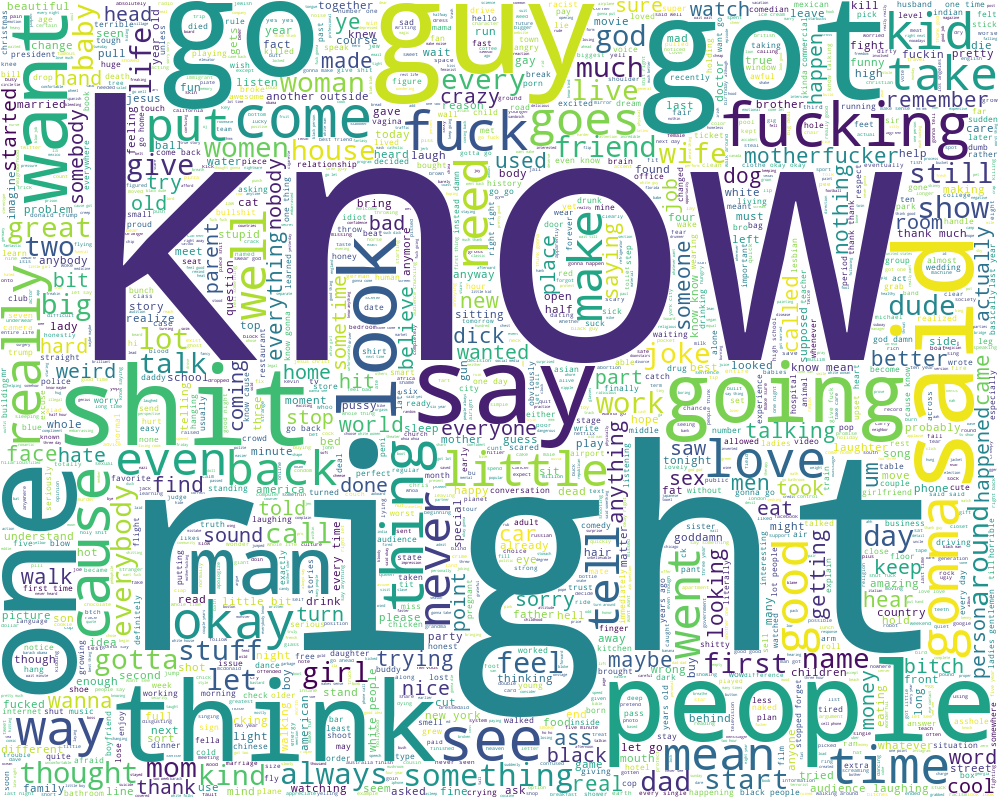

In [ ]:
wordcloud.generate(unique_string)
wordcloud.to_image()

Saving this combined corpus as a list of words and with their frequencies.

In [ ]:
df_from_flat_list = pd.DataFrame(flat_list,columns =['words'])
print(df_from_flat_list)

            words
0             man
1           thank
2             let
3          ladies
4       gentlemen
...           ...
641735    someone
641736     please
641737       come
641738    fucking
641739        get

[641740 rows x 1 columns]


In [ ]:
freq_table = pd.crosstab(df_from_flat_list['words'], 'no_of_words')

In [ ]:
freq_table.reset_index(inplace=True)

In [ ]:
freq_table

col_0,words,no_of_words
0,aa,5
1,aaa,4
2,aaaa,1
3,aaaaaa,3
4,aaaaaaarhhh,1
...,...,...
28077,zydeco,2
28078,zyrtec,1
28079,zz,1
28080,zzzp,3


Exporting the resulting file as a csv file for visualization in Tableau.

In [ ]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
word_freq = freq_table.to_csv('/drive/MyDrive/Project/freq_table11-9.csv', header=True, index=False) 

# **Analyzing the Individual Word Frequencies of Scripts**

Importing the counter function and count the frequencies of all the words used within individual scripts.

In [ ]:
from collections import Counter

In [ ]:
df['text_word_counts']=df['text_cleaned2'].str.split().apply(Counter)

In [ ]:
df['text_word_counts'].head()

0    {'hey': 2, 'man': 25, 'how': 18, 'are': 36, 'y...
1    {'okay': 21, 'ready': 3, 'and…': 5, 'take': 13...
2    {'ii': 13, '–': 16, 'ladies': 3, 'and': 259, '...
3    {'ladies': 1, 'gentlemen': 1, 'and': 173, 'eve...
4    {'ladies': 6, 'and': 235, 'gentlemen': 1, 'ple...
Name: text_word_counts, dtype: object

To understand the complexity of the language used by each comedian, the below metric will be computed:

Unique Word Ratio= [# of Unique Words] / [# of Total Words] 

**Number of Total Words** was previously conoyted as "text_cleaned2_length".
Now generating the **Number of Unique Words** by counting the length of frequencies of words "text_word_counts".

In [ ]:
df['num_of_unique_word_counts'] = df['text_word_counts'].apply(len)

In [ ]:
df.head()

,url,title,raw_text,raw_text_length,text_cleaned,text_cleaned2,text_cleaned2_length,text_word_counts,num_of_unique_word_counts
0,https://scrapsfromtheloft.com/comedy/adam-devi...,[Adam DeVine: Best Time of Our Lives (2019) - ...,[rock music playing] [indistinct chatter] He...,47959,hey man how are you thank you let’s do this la...,hey man how are you thank you let’s do this la...,42138,"{'hey': 2, 'man': 25, 'how': 18, 'are': 36, 'y...",1761
1,https://scrapsfromtheloft.com/comedy/adam-sand...,[Adam Sandler: 100% Fresh (2018) - Full Transc...,"[man] Okay, ready, and… Take your own cue, A...",32570,okay ready and… take your own cue adam and act...,okay ready and… take your own cue adam and act...,27395,"{'okay': 21, 'ready': 3, 'and…': 5, 'take': 13...",1137
2,https://scrapsfromtheloft.com/comedy/al-madrig...,[AL MADRIGAL: WHY IS THE RABBIT CRYING? (2013)...,[dog barks] [FisherGreen’s Sisters Brothers ...,53339,ii – ladies and gentlemen please give a warm w...,ii – ladies and gentlemen please give a warm w...,50809,"{'ii': 13, '–': 16, 'ladies': 3, 'and': 259, '...",2182
3,https://scrapsfromtheloft.com/comedy/ali-wong-...,[Ali Wong: Don Wong (2022) | Transcript - Scra...,"Ladies, gentlemen, and everybody, put your h...",29546,ladies gentlemen and everybody put your hands ...,ladies gentlemen and everybody put your hands ...,28645,"{'ladies': 1, 'gentlemen': 1, 'and': 173, 'eve...",1496
4,https://scrapsfromtheloft.com/comedy/ali-wong-...,[ALI WONG: BABY COBRA (2016) - Full Transcript...,"Ladies and gentlemen, please welcome to the ...",38981,ladies and gentlemen please welcome to the sta...,ladies and gentlemen please welcome to the sta...,37656,"{'ladies': 6, 'and': 235, 'gentlemen': 1, 'ple...",1711


Calculating the **Unique Word Ratio** by dividing them.

In [ ]:
df['unique_word_ratio']=df['num_of_unique_word_counts']/df['text_cleaned2_length']
df['unique_word_ratio'].describe()

count    159.000000
mean       0.040271
std        0.005813
min        0.026953
25%        0.035853
50%        0.039848
75%        0.043369
max        0.056521
Name: unique_word_ratio, dtype: float64

In [ ]:
df.head()

,url,title,raw_text,raw_text_length,text_cleaned,text_cleaned2,text_cleaned2_length,text_word_counts,num_of_unique_word_counts,unique_word_ratio
0,https://scrapsfromtheloft.com/comedy/adam-devi...,[Adam DeVine: Best Time of Our Lives (2019) - ...,[rock music playing] [indistinct chatter] He...,47959,hey man how are you thank you let’s do this la...,hey man how are you thank you let’s do this la...,42138,"{'hey': 2, 'man': 25, 'how': 18, 'are': 36, 'y...",1761,0.041791
1,https://scrapsfromtheloft.com/comedy/adam-sand...,[Adam Sandler: 100% Fresh (2018) - Full Transc...,"[man] Okay, ready, and… Take your own cue, A...",32570,okay ready and… take your own cue adam and act...,okay ready and… take your own cue adam and act...,27395,"{'okay': 21, 'ready': 3, 'and…': 5, 'take': 13...",1137,0.041504
2,https://scrapsfromtheloft.com/comedy/al-madrig...,[AL MADRIGAL: WHY IS THE RABBIT CRYING? (2013)...,[dog barks] [FisherGreen’s Sisters Brothers ...,53339,ii – ladies and gentlemen please give a warm w...,ii – ladies and gentlemen please give a warm w...,50809,"{'ii': 13, '–': 16, 'ladies': 3, 'and': 259, '...",2182,0.042945
3,https://scrapsfromtheloft.com/comedy/ali-wong-...,[Ali Wong: Don Wong (2022) | Transcript - Scra...,"Ladies, gentlemen, and everybody, put your h...",29546,ladies gentlemen and everybody put your hands ...,ladies gentlemen and everybody put your hands ...,28645,"{'ladies': 1, 'gentlemen': 1, 'and': 173, 'eve...",1496,0.052226
4,https://scrapsfromtheloft.com/comedy/ali-wong-...,[ALI WONG: BABY COBRA (2016) - Full Transcript...,"Ladies and gentlemen, please welcome to the ...",38981,ladies and gentlemen please welcome to the sta...,ladies and gentlemen please welcome to the sta...,37656,"{'ladies': 6, 'and': 235, 'gentlemen': 1, 'ple...",1711,0.045438


For generating word clouds for individual comedians, most frequently appearing 100 words are generated for each script.

In [ ]:
df['most_common_words']=df['text_cleaned2'].str.split().apply(lambda x: Counter(x).most_common(100))

In [ ]:
df.head()

,url,title,raw_text,raw_text_length,text_cleaned,text_cleaned2,text_cleaned2_length,text_word_counts,num_of_unique_word_counts,unique_word_ratio,most_common_words
0,https://scrapsfromtheloft.com/comedy/adam-devi...,[Adam DeVine: Best Time of Our Lives (2019) - ...,[rock music playing] [indistinct chatter] He...,47959,hey man how are you thank you let’s do this la...,hey man how are you thank you let’s do this la...,42138,"{'hey': 2, 'man': 25, 'how': 18, 'are': 36, 'y...",1761,0.041791,"[(like, 254), (you, 252), (i, 244), (the, 232)..."
1,https://scrapsfromtheloft.com/comedy/adam-sand...,[Adam Sandler: 100% Fresh (2018) - Full Transc...,"[man] Okay, ready, and… Take your own cue, A...",32570,okay ready and… take your own cue adam and act...,okay ready and… take your own cue adam and act...,27395,"{'okay': 21, 'ready': 3, 'and…': 5, 'take': 13...",1137,0.041504,"[(and, 207), (the, 207), (i, 202), (you, 176),..."
2,https://scrapsfromtheloft.com/comedy/al-madrig...,[AL MADRIGAL: WHY IS THE RABBIT CRYING? (2013)...,[dog barks] [FisherGreen’s Sisters Brothers ...,53339,ii – ladies and gentlemen please give a warm w...,ii – ladies and gentlemen please give a warm w...,50809,"{'ii': 13, '–': 16, 'ladies': 3, 'and': 259, '...",2182,0.042945,"[(the, 329), (i, 297), (a, 277), (and, 259), (..."
3,https://scrapsfromtheloft.com/comedy/ali-wong-...,[Ali Wong: Don Wong (2022) | Transcript - Scra...,"Ladies, gentlemen, and everybody, put your h...",29546,ladies gentlemen and everybody put your hands ...,ladies gentlemen and everybody put your hands ...,28645,"{'ladies': 1, 'gentlemen': 1, 'and': 173, 'eve...",1496,0.052226,"[(to, 188), (and, 173), (you, 164), (the, 160)..."
4,https://scrapsfromtheloft.com/comedy/ali-wong-...,[ALI WONG: BABY COBRA (2016) - Full Transcript...,"Ladies and gentlemen, please welcome to the ...",38981,ladies and gentlemen please welcome to the sta...,ladies and gentlemen please welcome to the sta...,37656,"{'ladies': 6, 'and': 235, 'gentlemen': 1, 'ple...",1711,0.045438,"[(i, 243), (and, 235), (the, 201), (a, 187), (..."


For visualizing the output in Tableau, the key metrics are saved as csv file,

In [ ]:
columns = ["url", "text_cleaned2_length", "num_of_unique_word_counts", "unique_word_ratio","most_common_words"]

In [ ]:
save_resulting_df = df.to_csv('/drive/My Drive/Project/word_count_analysis.csv', header=True, index=False, columns = columns) 